In [1]:
import xarray, matplotlib.pyplot as plt

In [2]:
%matplotlib inline

Open the monthly surface temperature dataset from the ACCESS-1.3 CMIP5 model from 1950 to the most recent output (2005). Also select out the `tas` variable and do spatial slicing in the same call

In [3]:
url = 'http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc'
tas_aus = xarray.open_dataset(url).tas.sel(lat=slice(-50,-5), lon=slice(110,160))

In [4]:
tas_aus

<xarray.DataArray 'tas' (time: 1872, lat: 37, lon: 27)>
[1870128 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat      (lat) float64 -50.0 -48.75 -47.5 -46.25 ... -8.75 -7.5 -6.25 -5.0
  * lon      (lon) float64 110.6 112.5 114.4 116.2 ... 153.8 155.6 157.5 159.4
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-02-05T23:49:51Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

Just check the slicing is correct by plotting the first time step

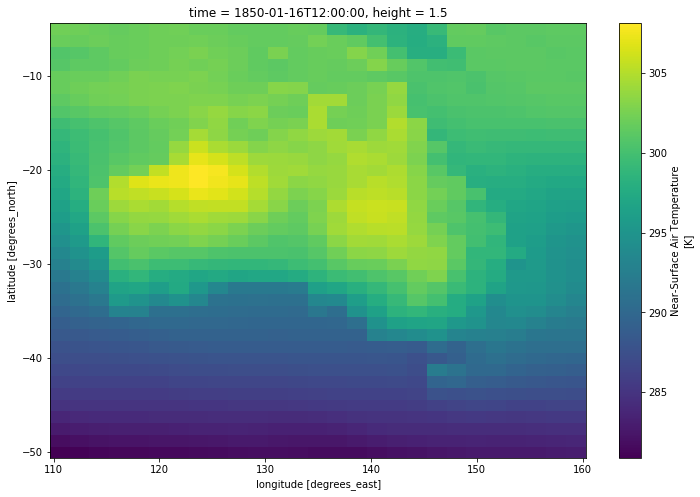

In [5]:
tas_aus.isel(time=0).plot(size=8)

Now create a monthly climatology for 1950-1980 period

In [6]:
tas_aus_clim = tas_aus.sel(time=slice('1950-01','1979-12')).groupby('time.month').mean(dim='time')

Plot all 12 climatological months

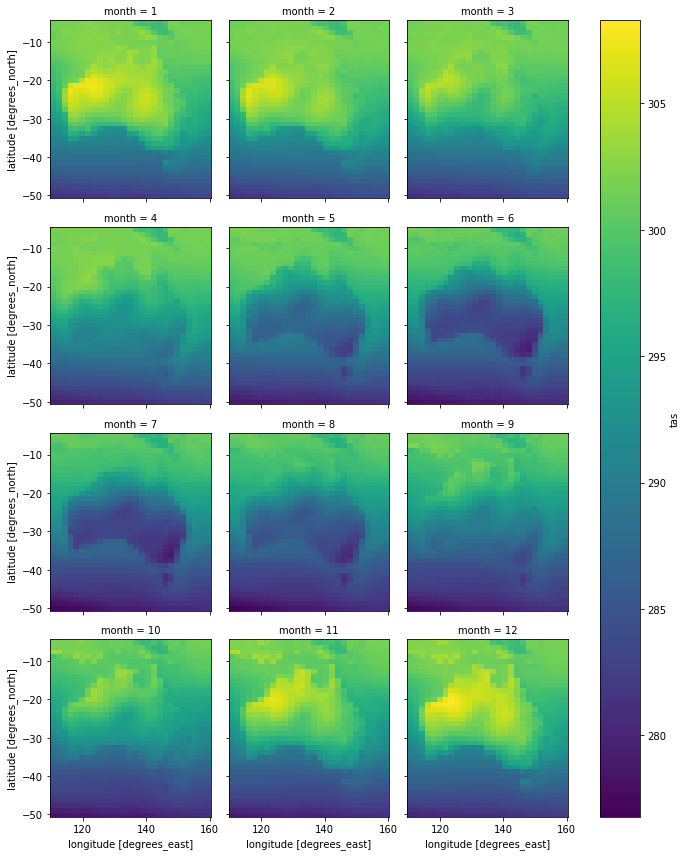

In [7]:
tas_aus_clim.plot(col='month',col_wrap=3)

Calculate the anomalies from the climatology

In [8]:
tas_aus_anom = (tas_aus.groupby('time.month') - tas_aus_clim)

Now plot the mean anomaly from 1990 to the end of 2005, the last time point in the dataset, by month. This shows the spatial pattern of warming in the model by month.

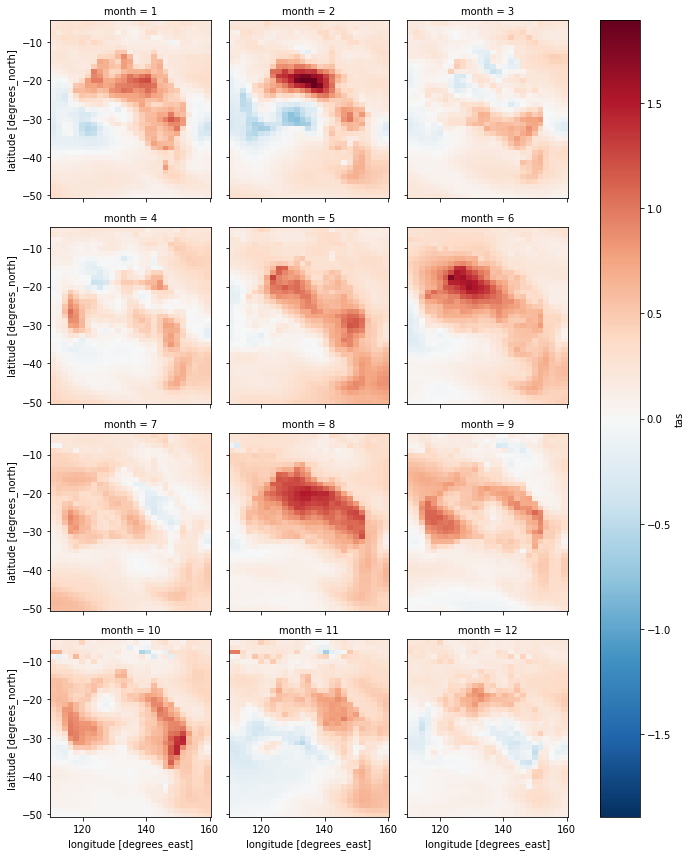

In [9]:
tas_aus_anom.sel(time=slice('1990-01',None)).groupby('time.month').mean(dim='time').plot(col='month',col_wrap=3)

Could use the land fraction data to only plot the land cells

In [10]:
url = 'http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/fx/atmos/fx/r0i0p0/latest/sftlf/sftlf_fx_ACCESS1-3_historical_r0i0p0.nc'
landfrac = xarray.open_dataset(url).sftlf

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


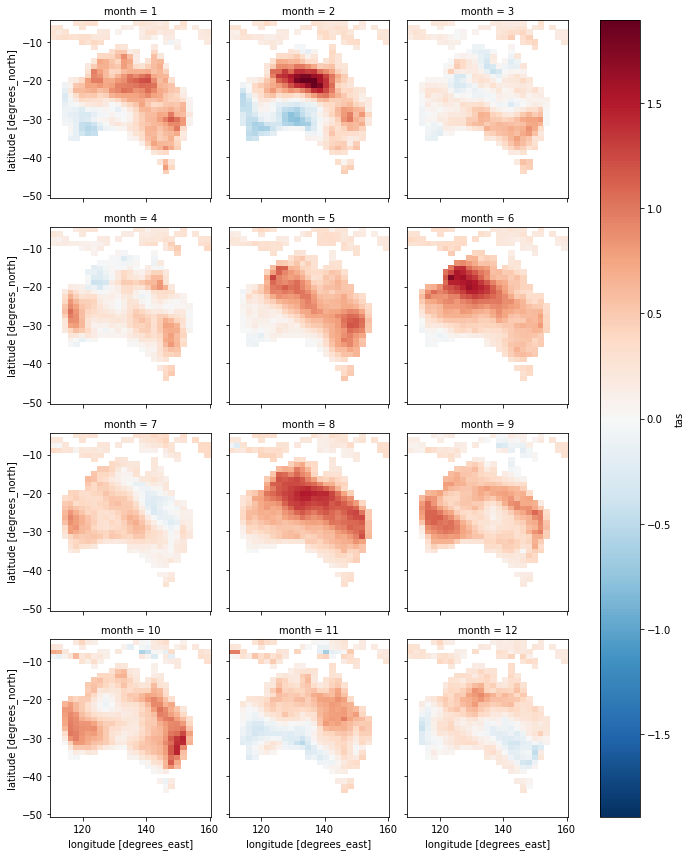

In [11]:
tas_aus_anom.sel(time=slice('1990-01',None)).where(landfrac>0).groupby('time.month').mean(dim='time').plot(col='month',col_wrap=3)